In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_json("exps.jsonl", lines=True)
print(len(df))
df.head()

136


,id,name,params.dataset.path,params.dataset.name,params.dataset.split,params.qa.model,params.qa.temperature,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,...,metrics.gen_token_count.success.max,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max,params.qa.technique
0,85a91ee74b2f73824442339b95747ad6cb4037dc,ample-jags,bdsaglam/musique-sweep,answerable,train,llama-3-70b-tgi,0.1,cot/format-thought.txt,cq.txt,semi/cot.json,...,145,73,62.506849,21.579390,26,46.0,56.0,80.0,130,COT
1,3d6b12159e1a42596ea25d8bbef11efa1cadf88d,blest-jeer,bdsaglam/musique-sweep,answerable,train,llama-3-70b-tgi,0.5,cte/format-triples-ere-few.txt,cq.txt,semi/cte-triples.json,...,171,233,22.828326,37.135419,0,0.0,0.0,51.0,169,CTE
2,9eb956bda7bb877acfa9e5e54438be45ad8be972,nasty-gaze,bdsaglam/musique-sweep,answerable,train,llama-3-70b-tgi,0.5,cok/adapted.txt,cq.txt,semi/cok.json,...,168,80,96.600000,23.599292,18,80.0,93.5,111.5,176,COK
3,9224f54444629417c2b43e2d0496e53b49e7f5ef,sural-daff,bdsaglam/musique-sweep,answerable,train,llama-3-70b-tgi,0.1,cok/adapted.txt,cq.txt,semi/cok.json,...,155,69,97.043478,23.868780,55,78.0,95.0,111.0,156,COK
4,1fe9f99f56631ca8a9391a3bf846ac5968eae7ef,deism-walk,bdsaglam/musique-sweep,answerable,train,llama-3-70b-tgi,0.7,direct/format-few.txt,cq.txt,semi/direct.json,...,11,74,6.175676,3.080465,3,4.0,5.0,8.0,17,DIRECT


In [3]:
param_cols = [col for col in df.columns if col.startswith("params.")]
metric_cols = [col for col in df.columns if col.startswith("metrics.")]
df.drop(
    columns=[
        "id",
        "params.dataset.path",
        "params.dataset.name",
        "params.dataset.split",
        "params.qa.model",
    ],
    inplace=True,
)

In [4]:
target_param_cols = [
    "params.qa.technique",
    "params.qa.system_prompt",
    "params.qa.few_shot_examples",
    "params.qa.n_shot",
    "params.qa.n_sc",
    "params.qa.temperature",
]
df = df.sort_values(target_param_cols + ["params.run"])
df.reset_index(drop=True, inplace=True)
df.head()

,name,params.qa.temperature,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,params.qa.n_shot,params.qa.n_sc,params.run,metrics.exact_match,metrics.f1,...,metrics.gen_token_count.success.max,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max,params.qa.technique
0,blame-dook,0.0,ccot/format-thought.txt,cq.txt,semi/ccot.json,0,1,1,0.633333,0.736454,...,96,82,49.048780,15.696899,23,39.25,46.5,57.00,97,CCOT
1,mated-feme,0.0,ccot/format-thought.txt,cq.txt,semi/ccot.json,0,1,2,0.650000,0.744380,...,85,78,50.974359,16.537226,23,40.00,49.0,60.00,99,CCOT
2,rindy-boot,0.1,ccot/format-thought.txt,cq.txt,semi/ccot.json,0,1,2,0.633333,0.732861,...,81,83,50.421687,16.847320,23,38.50,47.0,61.00,99,CCOT
3,about-ossa,1.0,ccot/format-thought.txt,cq.txt,semi/ccot.json,0,1,2,0.630000,0.748368,...,121,78,52.692308,19.916258,24,38.75,50.0,64.75,115,CCOT
4,jaggy-jynx,0.0,ccot/format-thought.txt,cq.txt,semi/ccot.json,1,1,1,0.636667,0.732997,...,90,80,49.387500,20.153521,5,37.00,46.5,60.50,100,CCOT


In [5]:
run_counts = df.groupby(target_param_cols)["params.run"].aggregate(tuple).reset_index()
mask = run_counts["params.run"].map(len) != 3
run_counts.loc[mask]

,params.qa.technique,params.qa.system_prompt,params.qa.few_shot_examples,params.qa.n_shot,params.qa.n_sc,params.qa.temperature,params.run
0,CCOT,ccot/format-thought.txt,semi/ccot.json,0,1,0.0,"(1, 2)"
1,CCOT,ccot/format-thought.txt,semi/ccot.json,0,1,0.1,"(2,)"
2,CCOT,ccot/format-thought.txt,semi/ccot.json,0,1,1.0,"(2,)"
3,CCOT,ccot/format-thought.txt,semi/ccot.json,1,1,0.0,"(1,)"
4,CCOT,ccot/format-thought.txt,semi/ccot.json,1,1,0.5,"(1,)"
...,...,...,...,...,...,...,...
92,DIRECT,direct/format-few.txt,semi/direct.json,3,1,0.0,"(1, 2)"
93,DIRECT,direct/format-few.txt,semi/direct.json,3,1,0.1,"(1,)"
94,DIRECT,direct/format-few.txt,semi/direct.json,3,1,0.5,"(1,)"
95,DIRECT,direct/format-few.txt,semi/direct.json,3,1,0.7,"(1, 2)"


In [6]:
def remove_ext(filename):
    return filename.split(".", 1)[0]

df["params.qa.system_prompt"] = df["params.qa.system_prompt"].map(remove_ext)
df["params.qa.user_prompt_template"] = df["params.qa.user_prompt_template"].map(remove_ext)
df["params.qa.few_shot_examples"] = df["params.qa.few_shot_examples"].map(remove_ext)

In [7]:
df['params.qa.system_prompt'].unique()

array(['ccot/format-thought', 'cok/adapted', 'cot/format-thought',
       'cte/format-triples-ere-few', 'cte/format-triples-few',
       'direct/format-few'], dtype=object)

In [8]:
avg_df = df.groupby(target_param_cols)[metric_cols].max().reset_index()
avg_df.head()

,params.qa.technique,params.qa.system_prompt,params.qa.few_shot_examples,params.qa.n_shot,params.qa.n_sc,params.qa.temperature,metrics.exact_match,metrics.f1,metrics.2hops.exact_match,metrics.2hops.f1,...,metrics.gen_token_count.success.75%,metrics.gen_token_count.success.max,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max
0,CCOT,ccot/format-thought,semi/ccot,0,1,0.0,0.650000,0.744380,0.71,0.817960,...,53.00,96,82,50.974359,16.537226,23,40.00,49.0,60.00,99
1,CCOT,ccot/format-thought,semi/ccot,0,1,0.1,0.633333,0.732861,0.69,0.792542,...,52.00,81,83,50.421687,16.847320,23,38.50,47.0,61.00,99
2,CCOT,ccot/format-thought,semi/ccot,0,1,1.0,0.630000,0.748368,0.67,0.795243,...,53.00,121,78,52.692308,19.916258,24,38.75,50.0,64.75,115
3,CCOT,ccot/format-thought,semi/ccot,1,1,0.0,0.636667,0.732997,0.74,0.828738,...,50.25,90,80,49.387500,20.153521,5,37.00,46.5,60.50,100
4,CCOT,ccot/format-thought,semi/ccot,1,1,0.5,0.120000,0.156711,0.09,0.111508,...,50.50,85,254,30.051181,11.814163,13,24.25,28.0,31.00,93


In [9]:
# find the rows with max f1 score for each technique group
max_f1_rows = avg_df.groupby('params.qa.technique')["metrics.f1"].idxmax()
best_df = avg_df.loc[max_f1_rows, target_param_cols + metric_cols].sort_values('metrics.f1', ascending=False)
best_df

,params.qa.technique,params.qa.system_prompt,params.qa.few_shot_examples,params.qa.n_shot,params.qa.n_sc,params.qa.temperature,metrics.exact_match,metrics.f1,metrics.2hops.exact_match,metrics.2hops.f1,...,metrics.gen_token_count.success.75%,metrics.gen_token_count.success.max,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max
55,CTE,cte/format-triples-ere-few,semi/cte-triples,3,1,0.1,0.703333,0.794636,0.76,0.852036,...,52.00,92,62,51.177419,15.846108,27,39.00,49.0,61.5,100
36,COT,cot/format-thought,semi/cot,2,1,1.0,0.700000,0.787923,0.75,0.836024,...,73.75,127,66,66.166667,25.348393,24,48.50,64.5,75.5,170
24,COK,cok/adapted,semi/cok,2,1,1.0,0.690000,0.780655,0.74,0.839891,...,106.00,174,77,96.272727,26.021568,57,80.75,93.5,110.0,170
93,DIRECT,direct/format-few,semi/direct,3,1,0.1,0.673333,0.776472,0.72,0.833585,...,6.00,14,68,7.367647,6.996597,3,4.00,5.0,8.0,39
5,CCOT,ccot/format-thought,semi/ccot,2,1,0.5,0.663333,0.760960,0.71,0.805976,...,54.00,89,71,50.985915,18.009912,11,39.00,47.0,61.5,109


In [10]:
cols_to_display = target_param_cols + metric_cols[:2]

for n_shot in avg_df["params.qa.n_shot"].unique():
    mask = df["params.qa.n_shot"] == n_shot
    display(df[mask][cols_to_display].sort_values("metrics.f1", ascending=False))
    print('='*120)

,params.qa.technique,params.qa.system_prompt,params.qa.few_shot_examples,params.qa.n_shot,params.qa.n_sc,params.qa.temperature,metrics.exact_match,metrics.f1
57,CTE,cte/format-triples-ere-few,semi/cte-triples,0,1,0.0,0.673333,0.772872
56,CTE,cte/format-triples-ere-few,semi/cte-triples,0,1,0.0,0.673333,0.761232
62,CTE,cte/format-triples-ere-few,semi/cte-triples,0,1,0.7,0.656667,0.760009
3,CCOT,ccot/format-thought,semi/ccot,0,1,1.0,0.630000,0.748368
1,CCOT,ccot/format-thought,semi/ccot,0,1,0.0,0.650000,0.744380
38,COT,cot/format-thought,semi/cot,0,1,0.0,0.633333,0.736802
0,CCOT,ccot/format-thought,semi/ccot,0,1,0.0,0.633333,0.736454
84,CTE,cte/format-triples-few,semi/cte-triples,0,1,1.0,0.620000,0.734640
41,COT,cot/format-thought,semi/cot,0,1,1.0,0.623333,0.734519
2,CCOT,ccot/format-thought,semi/ccot,0,1,0.1,0.633333,0.732861


,params.qa.technique,params.qa.system_prompt,params.qa.few_shot_examples,params.qa.n_shot,params.qa.n_sc,params.qa.temperature,metrics.exact_match,metrics.f1
63,CTE,cte/format-triples-ere-few,semi/cte-triples,1,1,0.0,0.716667,0.790594
88,CTE,cte/format-triples-few,semi/cte-triples,1,1,0.1,0.710000,0.788583
92,CTE,cte/format-triples-few,semi/cte-triples,1,1,1.0,0.693333,0.781879
65,CTE,cte/format-triples-ere-few,semi/cte-triples,1,1,0.5,0.696667,0.775943
86,CTE,cte/format-triples-few,semi/cte-triples,1,1,0.0,0.683333,0.773331
66,CTE,cte/format-triples-ere-few,semi/cte-triples,1,1,0.5,0.710000,0.770687
23,COK,cok/adapted,semi/cok,1,1,0.5,0.686667,0.768224
67,CTE,cte/format-triples-ere-few,semi/cte-triples,1,1,0.7,0.690000,0.764268
25,COK,cok/adapted,semi/cok,1,1,1.0,0.690000,0.763746
91,CTE,cte/format-triples-few,semi/cte-triples,1,1,0.7,0.683333,0.762560


,params.qa.technique,params.qa.system_prompt,params.qa.few_shot_examples,params.qa.n_shot,params.qa.n_sc,params.qa.temperature,metrics.exact_match,metrics.f1
95,CTE,cte/format-triples-few,semi/cte-triples,2,1,0.0,0.706667,0.791191
48,COT,cot/format-thought,semi/cot,2,1,1.0,0.700000,0.787923
96,CTE,cte/format-triples-few,semi/cte-triples,2,1,0.1,0.703333,0.786369
71,CTE,cte/format-triples-ere-few,semi/cte-triples,2,1,0.7,0.700000,0.783084
31,COK,cok/adapted,semi/cok,2,1,1.0,0.690000,0.780655
97,CTE,cte/format-triples-few,semi/cte-triples,2,1,0.5,0.686667,0.777944
124,DIRECT,direct/format-few,semi/direct,2,1,0.7,0.673333,0.774283
123,DIRECT,direct/format-few,semi/direct,2,1,0.5,0.686667,0.774235
28,COK,cok/adapted,semi/cok,2,1,0.1,0.683333,0.772791
118,DIRECT,direct/format-few,semi/direct,2,1,0.0,0.670000,0.770307


,params.qa.technique,params.qa.system_prompt,params.qa.few_shot_examples,params.qa.n_shot,params.qa.n_sc,params.qa.temperature,metrics.exact_match,metrics.f1
75,CTE,cte/format-triples-ere-few,semi/cte-triples,3,1,0.1,0.703333,0.794636
33,COK,cok/adapted,semi/cok,3,1,0.1,0.700000,0.778137
34,COK,cok/adapted,semi/cok,3,1,0.1,0.683333,0.777995
130,DIRECT,direct/format-few,semi/direct,3,1,0.1,0.673333,0.776472
133,DIRECT,direct/format-few,semi/direct,3,1,0.7,0.676667,0.775341
102,CTE,cte/format-triples-few,semi/cte-triples,3,1,0.0,0.680000,0.774716
32,COK,cok/adapted,semi/cok,3,1,0.0,0.686667,0.773389
77,CTE,cte/format-triples-ere-few,semi/cte-triples,3,1,0.5,0.693333,0.773115
50,COT,cot/format-thought,semi/cot,3,1,0.1,0.660000,0.771413
80,CTE,cte/format-triples-ere-few,semi/cte-triples,3,1,1.0,0.666667,0.770786


## Visualizations

In [11]:
def prepare_data(dataf):
    # Simplify column names for use in formula
    dataf = dataf[target_param_cols + ['params.run'] + metric_cols[:2]].rename(
        columns={
            col: col.replace("params.qa.", "").replace("params.", "").replace("metrics.", "")
            for col in dataf.columns
        }
    )

    # Combine prompts into a single column for simplicity
    dataf["prompt"] = (
        dataf["system_prompt"]
        + " | "
        + dataf["n_shot"].map(str)
    )

    return dataf


In [31]:
def plot_variance(dataf, x='temperature', y='f1', hue='prompt', technique=None, figsize=(12, 8), legend='auto', legend_loc='lower left'):  
    if technique:
        dataf = dataf[dataf['technique'] == technique]
    plt.figure(figsize=figsize)
    sns.lineplot(x=x, y=y, hue=hue, data=dataf, linewidth=2.5, legend=legend)
    plt.xlabel(x.title())
    plt.ylabel(y.title())
    plt.ylim(0, 1)
    if legend:
        plt.legend(loc=legend_loc)
    plt.tight_layout()
    plt.show()

In [43]:
def plot_variance_grid(dataf, x='temperature', y='f1', hue='prompt', figsize=(6, 4), legend='auto', legend_loc='lower left'):
    techniques = dataf['technique'].unique()
    n = len(techniques)
    n_cols = 2
    n_rows = (n + 1) // n_cols  # Calculate the number of rows needed for nx2 grid
    figsize = (figsize[0] * n_cols, figsize[1] * n_rows)  # Adjust the figure size based on the number of rows
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()  # Flatten the axes array for easy iteration

    for i, technique in enumerate(techniques):
        ax = axes[i]
        subset = dataf[dataf['technique'] == technique]
        sns.lineplot(x=x, y=y, hue=hue, data=subset, linewidth=2.5, legend=False, ax=ax)
        ax.set_title(technique)
        ax.set_xlabel(x.title())
        ax.set_ylabel(y.title())
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)

    # Remove any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

In [44]:
prepared_df = prepare_data(df)
zero_shot_mask = prepared_df["n_shot"] == 0
prepared_df

,technique,system_prompt,few_shot_examples,n_shot,n_sc,temperature,run,exact_match,f1,prompt
0,CCOT,ccot/format-thought,semi/ccot,0,1,0.0,1,0.633333,0.736454,ccot/format-thought | 0
1,CCOT,ccot/format-thought,semi/ccot,0,1,0.0,2,0.650000,0.744380,ccot/format-thought | 0
2,CCOT,ccot/format-thought,semi/ccot,0,1,0.1,2,0.633333,0.732861,ccot/format-thought | 0
3,CCOT,ccot/format-thought,semi/ccot,0,1,1.0,2,0.630000,0.748368,ccot/format-thought | 0
4,CCOT,ccot/format-thought,semi/ccot,1,1,0.0,1,0.636667,0.732997,ccot/format-thought | 1
...,...,...,...,...,...,...,...,...,...,...
131,DIRECT,direct/format-few,semi/direct,3,1,0.5,1,0.573333,0.674684,direct/format-few | 3
132,DIRECT,direct/format-few,semi/direct,3,1,0.7,1,0.503333,0.602520,direct/format-few | 3
133,DIRECT,direct/format-few,semi/direct,3,1,0.7,2,0.676667,0.775341,direct/format-few | 3
134,DIRECT,direct/format-few,semi/direct,3,1,1.0,1,0.653333,0.759288,direct/format-few | 3


In [45]:
mask = prepared_df['n_shot'] == 1

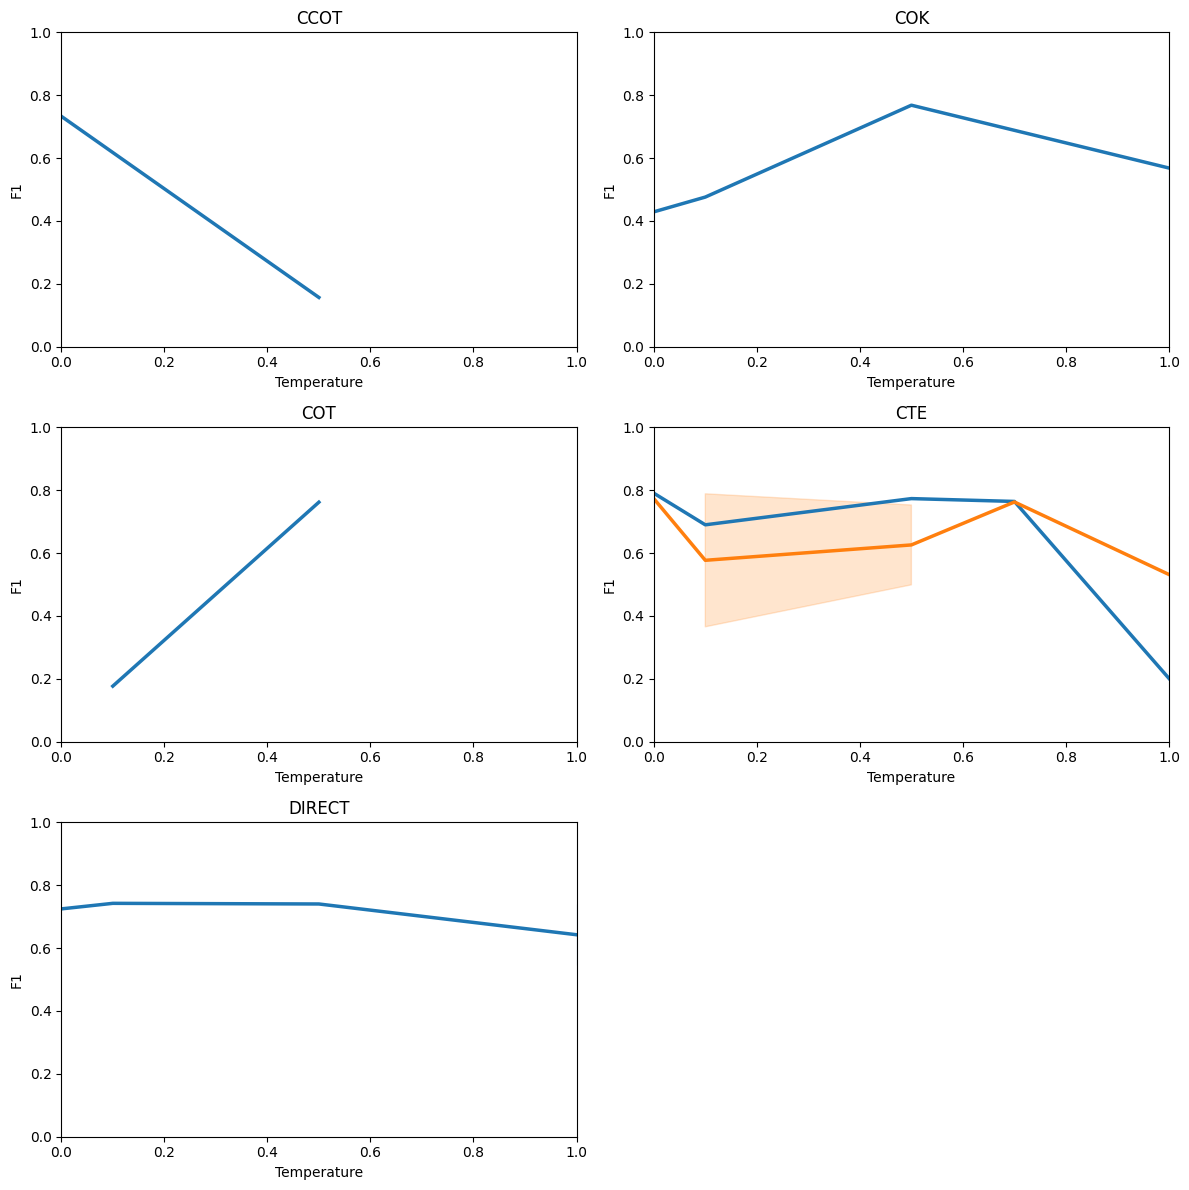

In [46]:
plot_variance_grid(prepared_df.loc[mask], x='temperature', y='f1', hue='prompt', legend_loc='upper left')

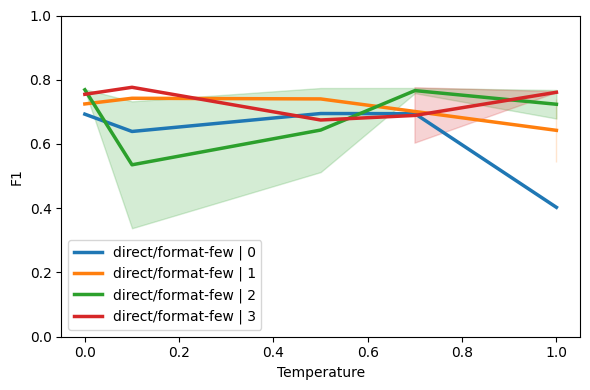

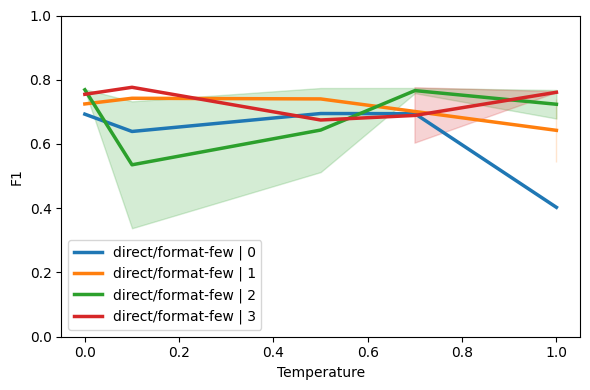

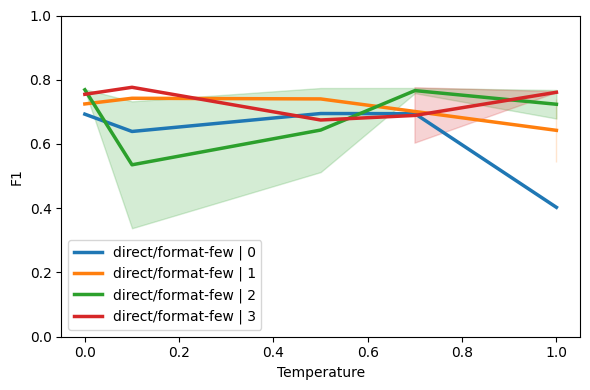

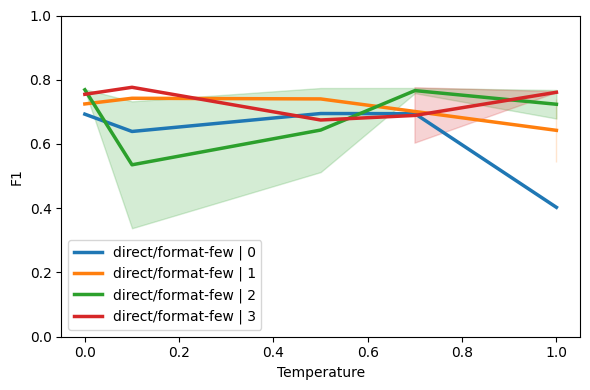

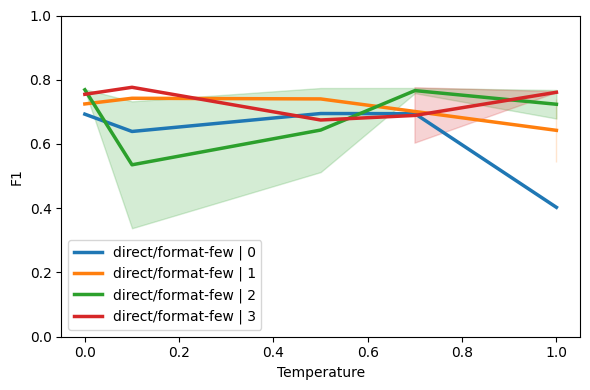

In [36]:
for technique in prepared_df['technique'].unique():
    plot_variance(prepared_df, technique='DIRECT', legend='brief', figsize=(6, 4))

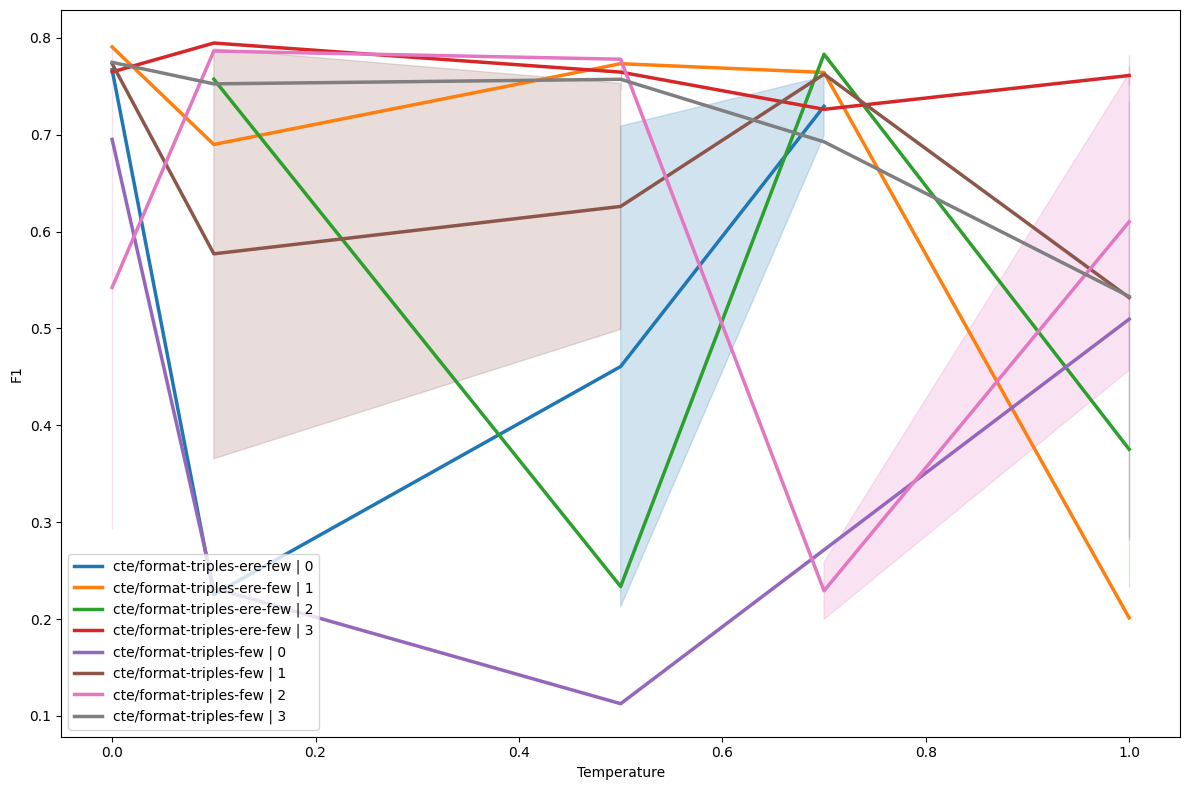

In [18]:
plot_variance(prepared_df, technique='CTE', legend='brief')

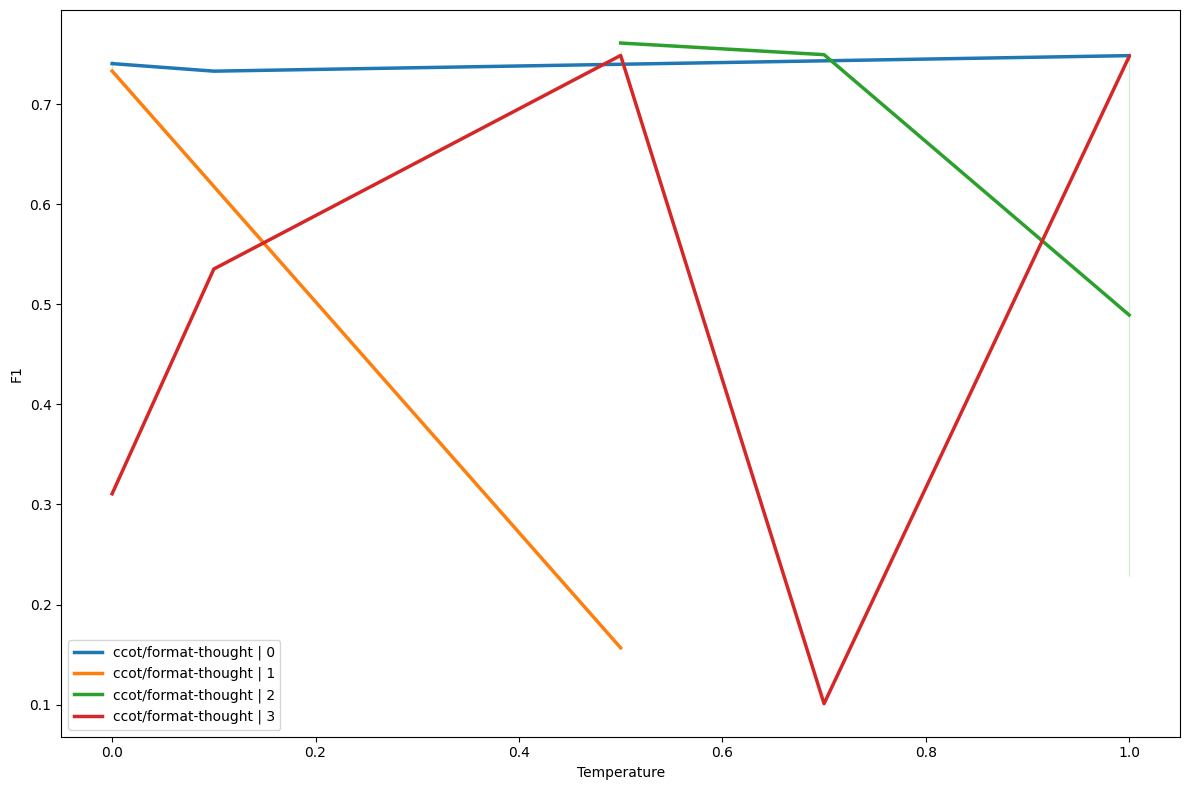

In [19]:
plot_variance(prepared_df, technique='CCOT', legend='brief')

In [20]:
best_df['params.run'] = 0
best_prompts = prepare_data(best_df).prompt.values.tolist()
_data = prepared_df.copy()
prompt_mask = _data['prompt'].isin(best_prompts)
best_prepared_df = _data.loc[prompt_mask]
best_prepared_df

,technique,system_prompt,few_shot_examples,n_shot,n_sc,temperature,run,exact_match,f1,prompt
6,CCOT,ccot/format-thought,semi/ccot,2,1,0.5,1,0.663333,0.760960,ccot/format-thought | 2
7,CCOT,ccot/format-thought,semi/ccot,2,1,0.7,1,0.643333,0.749349,ccot/format-thought | 2
8,CCOT,ccot/format-thought,semi/ccot,2,1,1.0,1,0.170000,0.228703,ccot/format-thought | 2
9,CCOT,ccot/format-thought,semi/ccot,2,1,1.0,2,0.643333,0.749789,ccot/format-thought | 2
26,COK,cok/adapted,semi/cok,2,1,0.0,1,0.673333,0.759333,cok/adapted | 2
27,COK,cok/adapted,semi/cok,2,1,0.1,1,0.670000,0.740931,cok/adapted | 2
28,COK,cok/adapted,semi/cok,2,1,0.1,2,0.683333,0.772791,cok/adapted | 2
29,COK,cok/adapted,semi/cok,2,1,0.5,1,0.423333,0.502704,cok/adapted | 2
30,COK,cok/adapted,semi/cok,2,1,1.0,1,0.663333,0.752414,cok/adapted | 2
31,COK,cok/adapted,semi/cok,2,1,1.0,2,0.690000,0.780655,cok/adapted | 2


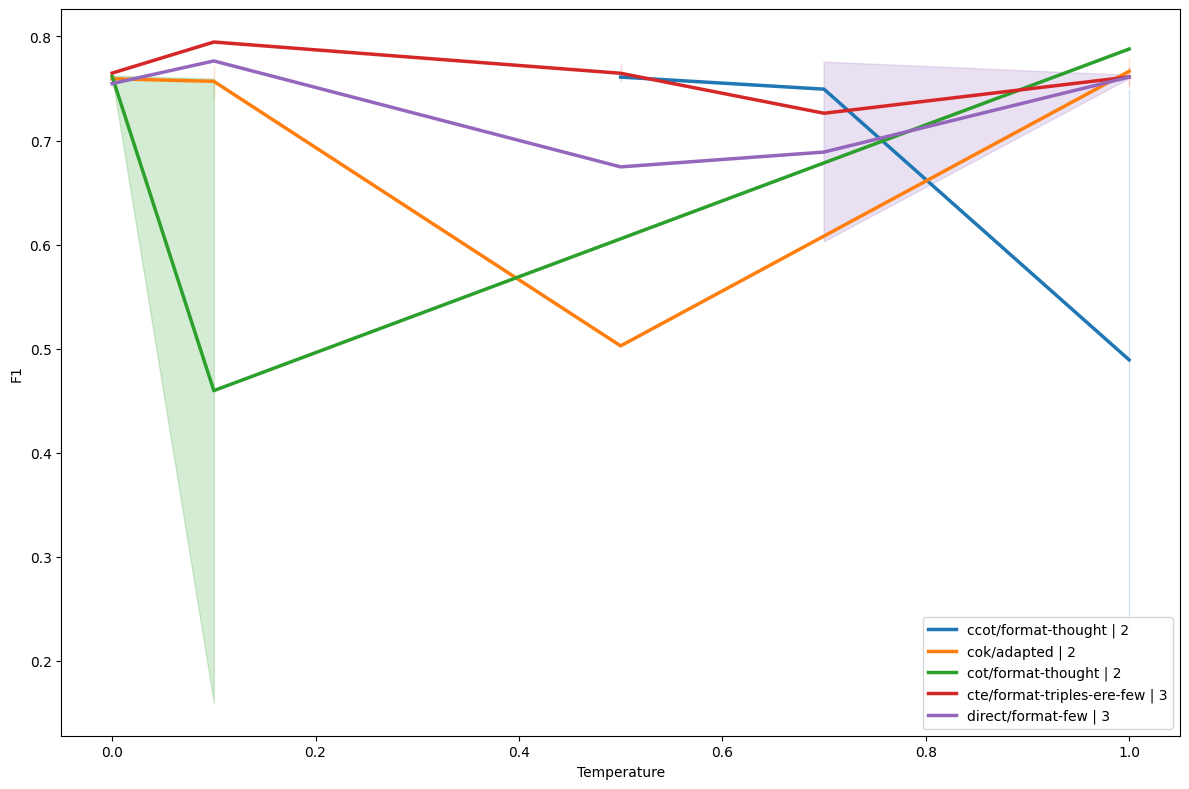

In [21]:
plot_variance(best_prepared_df, figsize=(12, 8), legend_loc='lower right')

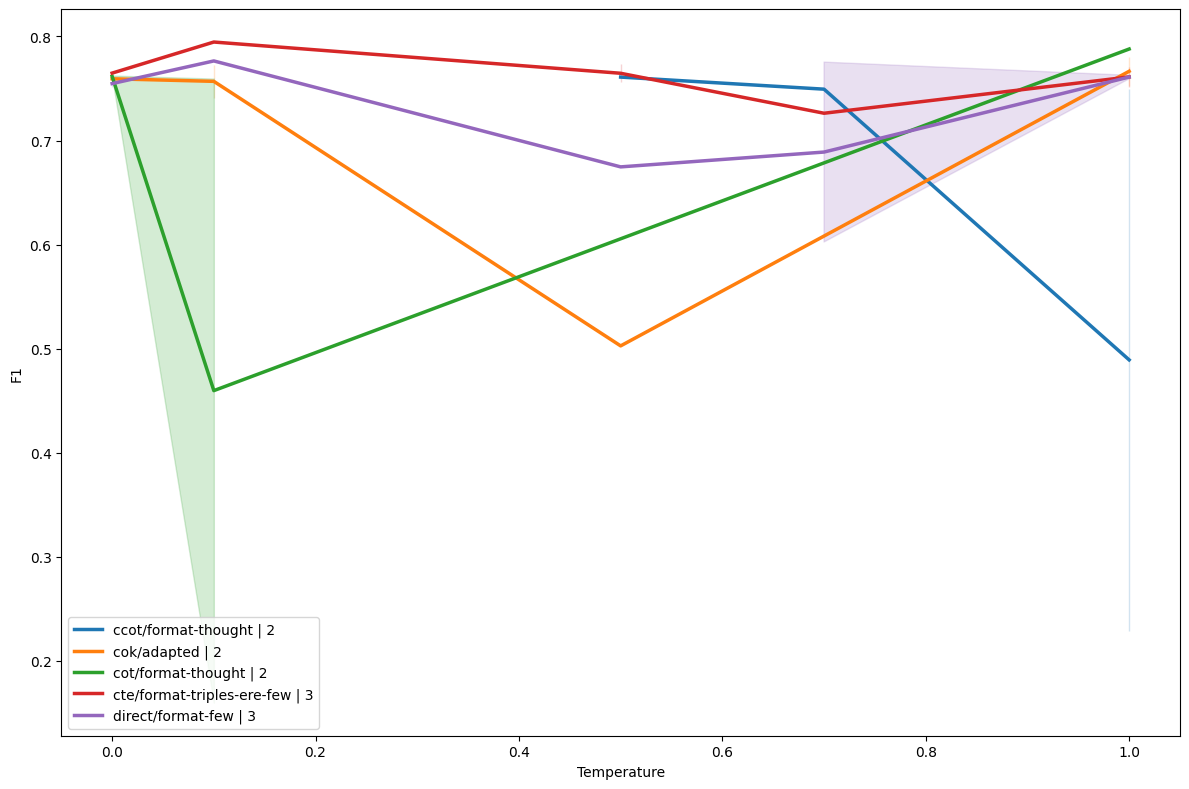

In [22]:
plot_variance(best_prepared_df, figsize=(12, 8), legend_loc='lower left')

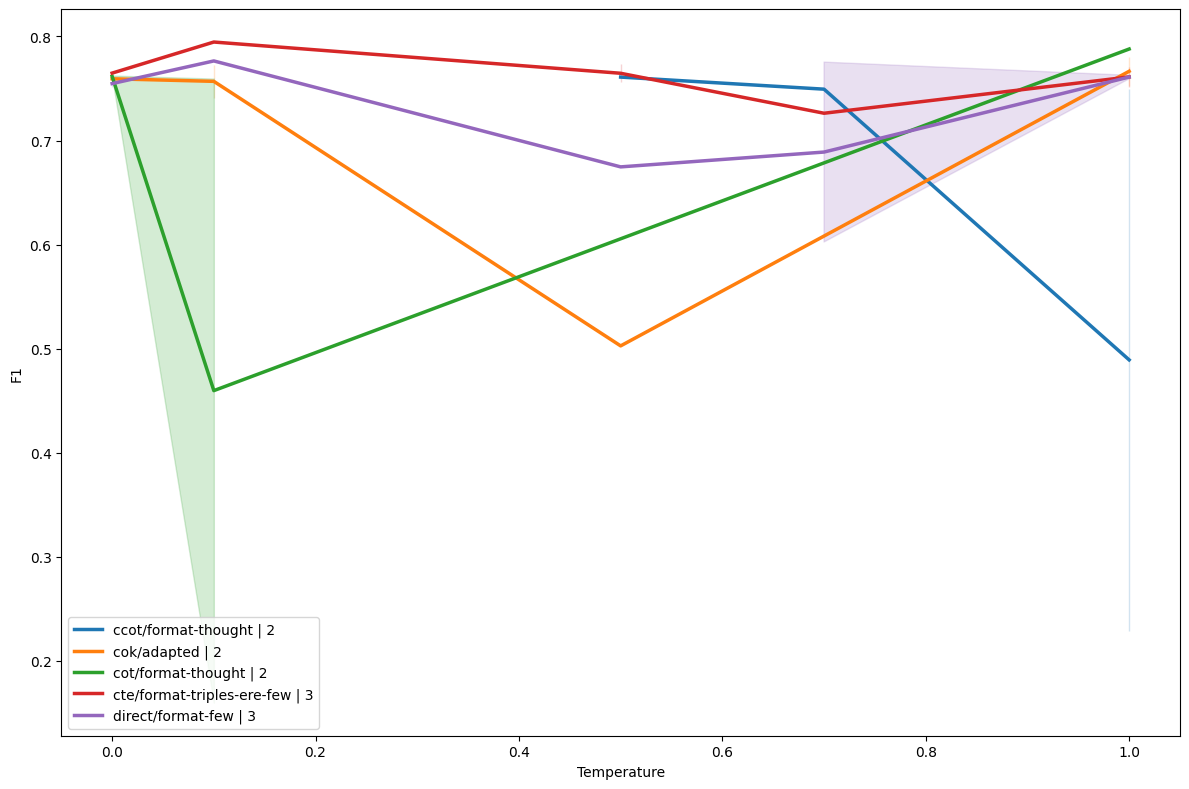

In [23]:
plot_variance(best_prepared_df[best_prepared_df['temperature'] <= 1.0], figsize=(12, 8), legend_loc='lower left')

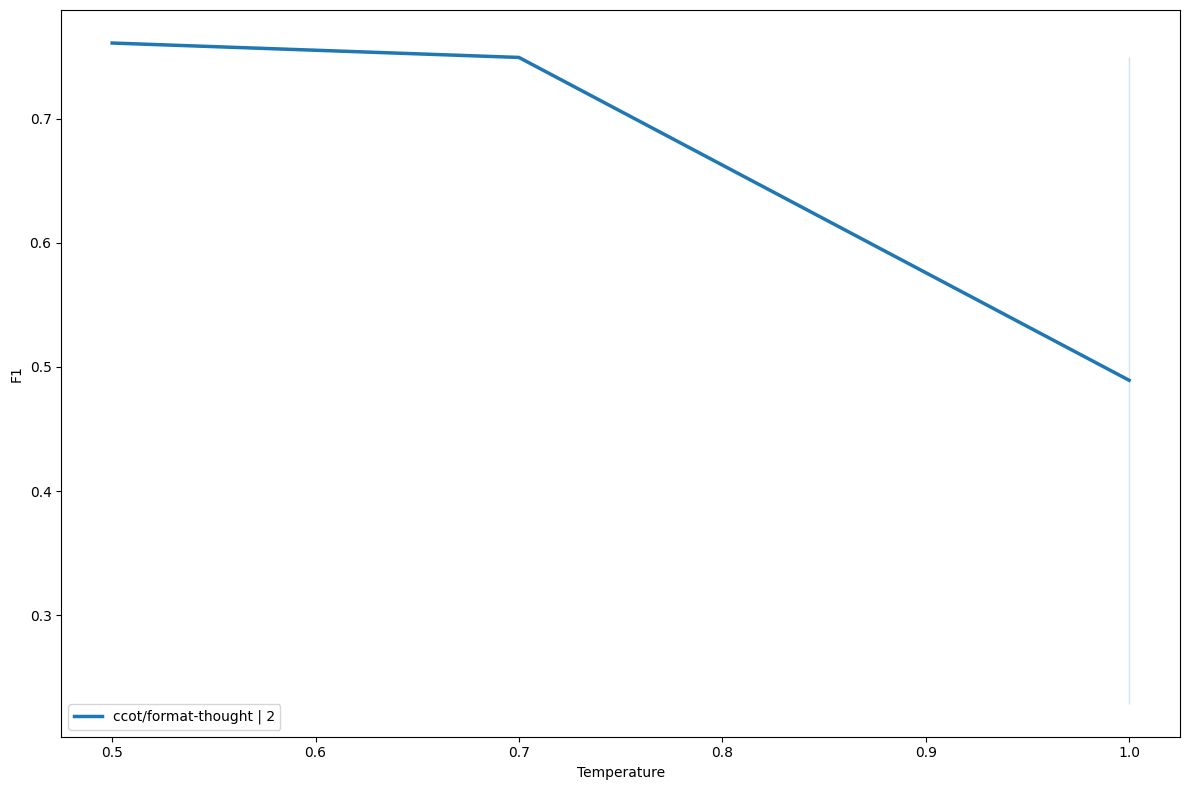

In [24]:
plot_variance(best_prepared_df[best_prepared_df['temperature'] <= 1.0], technique='CCOT', figsize=(12, 8), legend_loc='lower left')

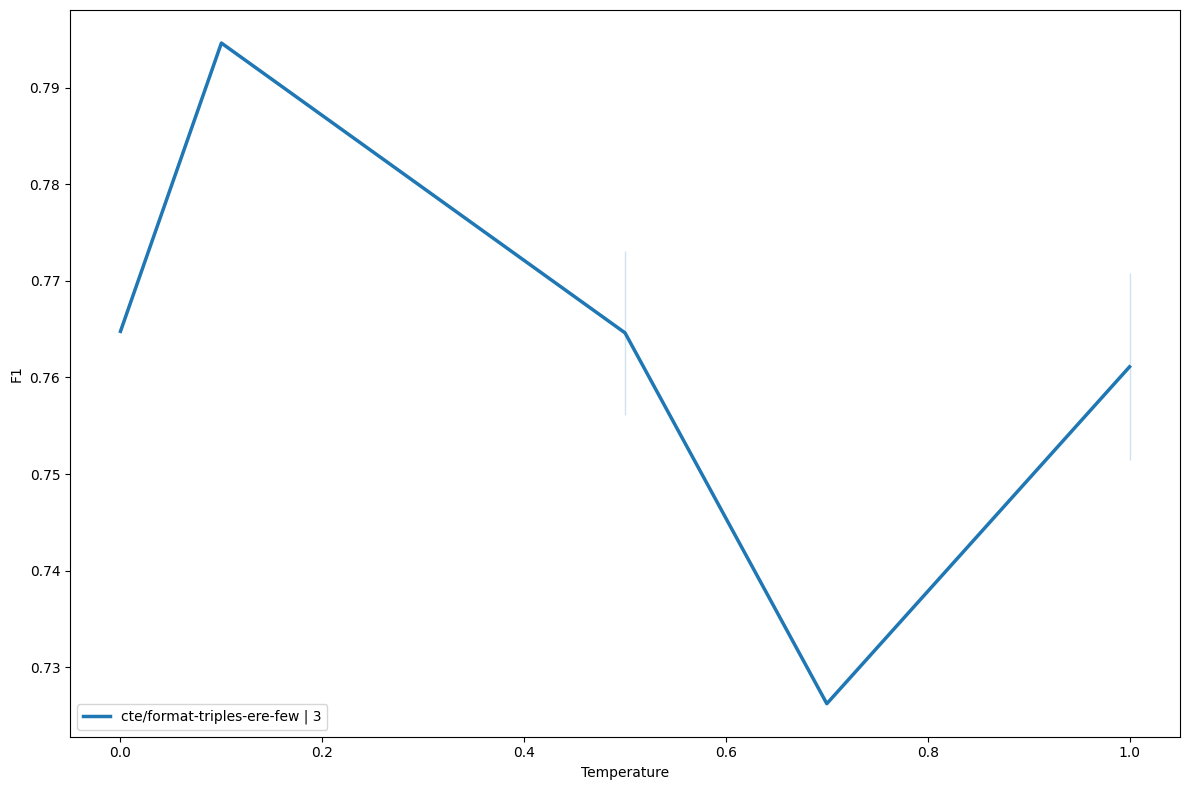

In [25]:
plot_variance(best_prepared_df[best_prepared_df['temperature'] <= 1.0], technique='CTE', figsize=(12, 8), legend_loc='lower left')

## Inspect

In [26]:
# # box-whisker plot
# plt.figure(figsize=(12, 8))
# sns.boxplot(
#     x="prompt",
#     y="f1",
#     data=prepared_df.sort_values(by="f1"),
# )
# plt.xticks(rotation=60, ha="right");

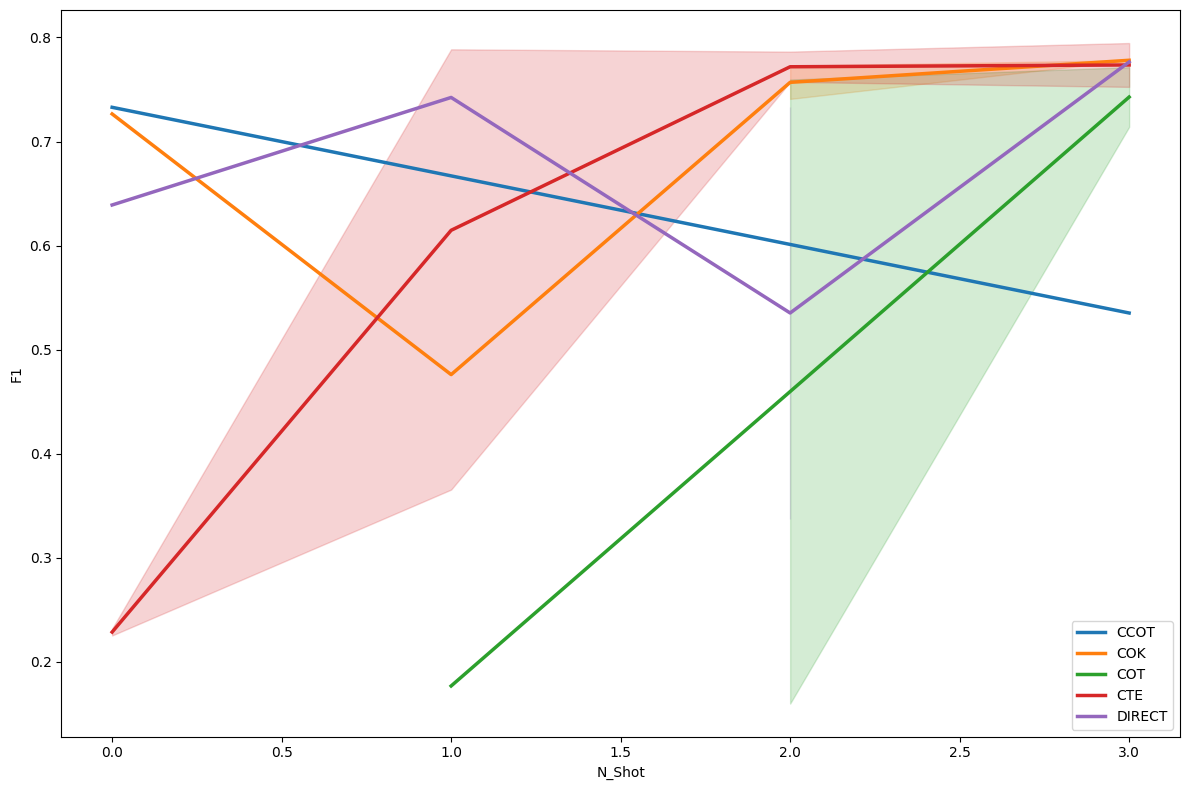

In [27]:
plot_variance(prepared_df[prepared_df['temperature'] == 0.1], x='n_shot', hue='technique', figsize=(12, 8), legend_loc='lower right')

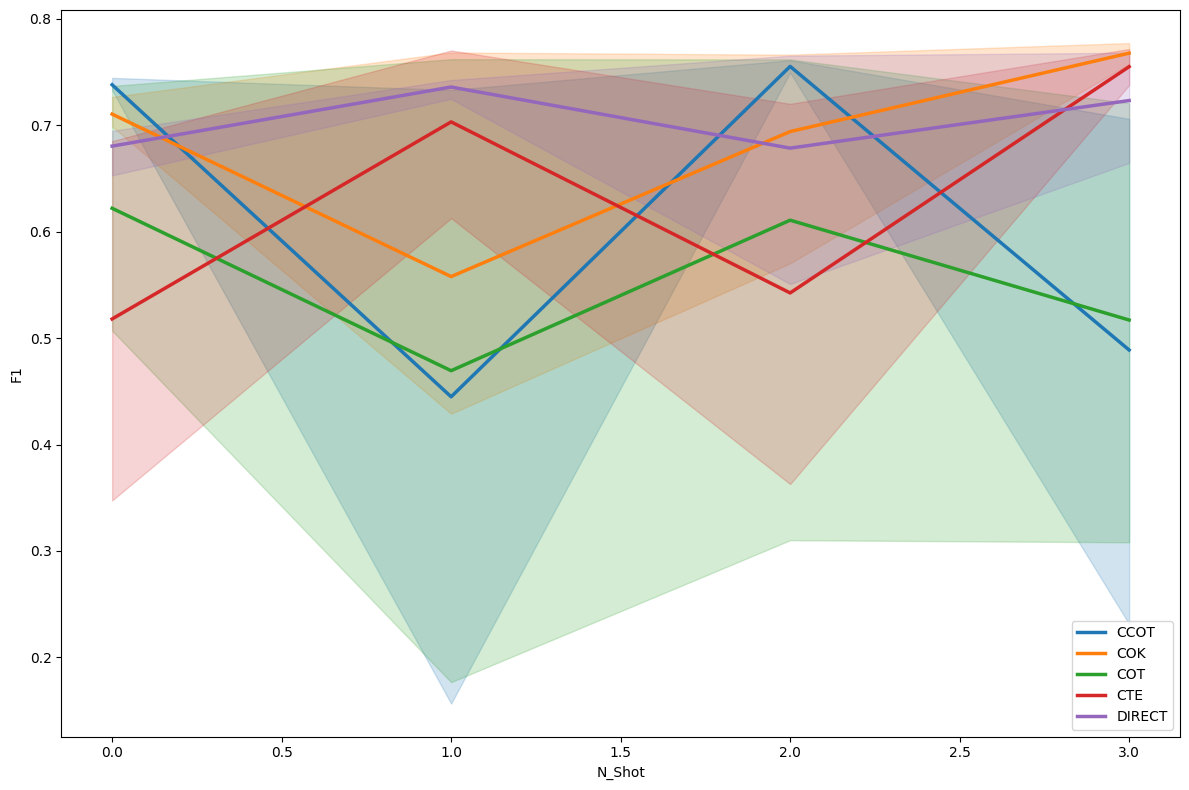

In [28]:
plot_variance(prepared_df[prepared_df['temperature'] < 1.0], x='n_shot', hue='technique', figsize=(12, 8), legend_loc='lower right')

In [29]:
df

,name,params.qa.temperature,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,params.qa.n_shot,params.qa.n_sc,params.run,metrics.exact_match,metrics.f1,...,metrics.gen_token_count.success.max,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max,params.qa.technique
0,blame-dook,0.0,ccot/format-thought,cq,semi/ccot,0,1,1,0.633333,0.736454,...,96,82,49.048780,15.696899,23,39.25,46.5,57.00,97,CCOT
1,mated-feme,0.0,ccot/format-thought,cq,semi/ccot,0,1,2,0.650000,0.744380,...,85,78,50.974359,16.537226,23,40.00,49.0,60.00,99,CCOT
2,rindy-boot,0.1,ccot/format-thought,cq,semi/ccot,0,1,2,0.633333,0.732861,...,81,83,50.421687,16.847320,23,38.50,47.0,61.00,99,CCOT
3,about-ossa,1.0,ccot/format-thought,cq,semi/ccot,0,1,2,0.630000,0.748368,...,121,78,52.692308,19.916258,24,38.75,50.0,64.75,115,CCOT
4,jaggy-jynx,0.0,ccot/format-thought,cq,semi/ccot,1,1,1,0.636667,0.732997,...,90,80,49.387500,20.153521,5,37.00,46.5,60.50,100,CCOT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,gules-flab,0.5,direct/format-few,cq,semi/direct,3,1,1,0.573333,0.674684,...,15,104,7.009615,7.589588,3,4.00,5.0,6.00,46,DIRECT
132,dosed-noma,0.7,direct/format-few,cq,semi/direct,3,1,1,0.503333,0.602520,...,15,128,6.320312,5.738300,3,4.00,5.0,5.00,33,DIRECT
133,beige-mirk,0.7,direct/format-few,cq,semi/direct,3,1,2,0.676667,0.775341,...,20,68,7.147059,6.543231,3,4.00,5.0,7.25,43,DIRECT
134,toric-rise,1.0,direct/format-few,cq,semi/direct,3,1,1,0.653333,0.759288,...,14,74,9.297297,13.534056,3,4.00,5.0,9.00,108,DIRECT


In [30]:
mask = (df['params.run'] == 2) & (df['params.qa.temperature'] == 0.1)
df.loc[mask].sort_values('metrics.f1', ascending=False)

,name,params.qa.temperature,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,params.qa.n_shot,params.qa.n_sc,params.run,metrics.exact_match,metrics.f1,...,metrics.gen_token_count.success.max,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max,params.qa.technique
88,grave-hard,0.1,cte/format-triples-few,cq,semi/cte-triples,1,1,2,0.710000,0.788583,...,93,65,48.384615,20.272127,23,35.00,44.0,58.00,149,CTE
34,sural-daff,0.1,cok/adapted,cq,semi/cok,3,1,2,0.683333,0.777995,...,155,69,97.043478,23.868780,55,78.00,95.0,111.00,156,COK
28,stout-mesh,0.1,cok/adapted,cq,semi/cok,2,1,2,0.683333,0.772791,...,160,71,94.830986,22.122378,55,77.50,92.0,108.00,185,COK
50,apish-bomb,0.1,cot/format-thought,cq,semi/cot,3,1,2,0.660000,0.771413,...,144,70,71.428571,29.078391,24,53.00,66.5,82.75,174,COT
47,ample-jags,0.1,cot/format-thought,cq,semi/cot,2,1,2,0.646667,0.759541,...,145,73,62.506849,21.579390,26,46.00,56.0,80.00,130,COT
114,broch-puns,0.1,direct/format-few,cq,semi/direct,1,1,2,0.636667,0.742340,...,10,79,6.481013,4.305217,2,4.00,5.0,8.00,21,DIRECT
2,rindy-boot,0.1,ccot/format-thought,cq,semi/ccot,0,1,2,0.633333,0.732861,...,81,83,50.421687,16.847320,23,38.50,47.0,61.00,99,CCOT
11,trial-ears,0.1,ccot/format-thought,cq,semi/ccot,3,1,2,0.450000,0.535195,...,119,143,102.391608,518.037780,13,36.00,46.0,65.50,6226,CCOT
22,ridgy-typo,0.1,cok/adapted,cq,semi/cok,1,1,2,0.416667,0.476003,...,159,164,74.914634,29.956288,3,57.75,71.0,90.50,177,COK
121,beige-pope,0.1,direct/format-few,cq,semi/direct,2,1,2,0.256667,0.337673,...,14,209,7.540670,7.769487,3,4.00,5.0,6.00,57,DIRECT
